<a href="https://colab.research.google.com/github/ShahKhalid1234/DATA-ANALYTICS-JOURNEY/blob/main/jobmarketanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahkhalidashraf","key":"705a28630928328defe7547f7a629c96"}'}

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"


In [ ]:
!kaggle datasets download -d arshkon/linkedin-job-postings



Dataset URL: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings
License(s): CC-BY-SA-4.0
 98% 156M/159M [00:01<00:00, 135MB/s]
100% 159M/159M [00:01<00:00, 125MB/s]


In [ ]:
!chmod 600 /content/kaggle.json


In [ ]:
import zipfile
import os

# Path to the zip file
zip_path = '/content/linkedin-job-postings.zip'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# List the extracted files to find 'postings.csv'
extracted_files = os.listdir('/content/')
extracted_files


['.config',
 'mappings',
 'linkedin-job-postings.zip',
 'jobs',
 'postings.csv',
 'kaggle.json',
 'companies',
 'sample_data']

In [ ]:
# Load the 'postings.csv' file
df = pd.read_csv('/content/postings.csv')

# Show the first few rows to inspect its structure
df.head()


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [ ]:
# Clean the 'skills_desc' column by removing NaN values and converting to lowercase
df['cleaned_skills'] = df['skills_desc'].fillna('').str.lower()

# Tokenize the skills (split by spaces)
df['skills_tokens'] = df['cleaned_skills'].str.split()

# Show the first few rows of extracted skills
df[['title', 'skills_tokens']].head()


,title,skills_tokens
0,Marketing Coordinator,"[requirements:, we, are, seeking, a, college, ..."
1,Mental Health Therapist/Counselor,[]
2,Assitant Restaurant Manager,"[we, are, currently, accepting, resumes, for, ..."
3,Senior Elder Law / Trusts and Estates Associat...,"[this, position, requires, a, baseline, unders..."
4,Service Technician,[]


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Remove rows with empty or NaN 'skills_tokens' lists
df = df[df['skills_tokens'].str.len() > 0]

# Flatten the 'skills_tokens' column to count skill frequency
all_skills = [skill for skills in df['skills_tokens'] for skill in skills]

# Count the frequency of each skill
from collections import Counter
skill_counts = Counter(all_skills)

# Show the 10 most common skills
most_common_skills = skill_counts.most_common(10)
most_common_skills


[('and', 2725),
 ('to', 1929),
 ('the', 1672),
 ('of', 1358),
 ('in', 888),
 ('a', 861),
 ('or', 781),
 ('with', 691),
 ('this', 660),
 ('position', 498)]

In [ ]:
# Define a list of stopwords to filter out
stopwords = set([
    'and', 'to', 'the', 'of', 'in', 'a', 'or', 'with', 'this', 'for', 'on', 'at', 'by', 'from', 'as', 'an', 'be', 'that', 'it', 'are', 'was', 'is', 'for', 'these', 'can', 'we', 'you', 'your'
])

# Filter out stopwords from 'skills_tokens'
filtered_skills = [skill for skill in all_skills if skill not in stopwords]

# Count the frequency of each filtered skill
filtered_skill_counts = Counter(filtered_skills)

# Show the 10 most common skills
most_common_filtered_skills = filtered_skill_counts.most_common(10)
most_common_filtered_skills


[('position', 498),
 ('following', 474),
 ('requires', 471),
 ('experience', 458),
 ('skills:', 451),
 ('work', 337),
 ('ability', 327),
 ('/', 307),
 ('must', 277),
 ('years', 225)]

In [ ]:
# Load the 'job_skills.csv' file
job_skills_df = pd.read_csv('/content/jobs/job_skills.csv')

# Show the first few rows to inspect its structure
job_skills_df.head()


,job_id,skill_abr
0,3884428798,MRKT
1,3884428798,PR
2,3884428798,WRT
3,3887473071,SALE
4,3887465684,FIN


In [ ]:
# Sample mapping of skill abbreviations to full skill names
skill_mapping = {
    'MRKT': 'Marketing',
    'PR': 'Public Relations',
    'WRT': 'Writing',
    'SALE': 'Sales',
    'FIN': 'Finance',
    'HR': 'Human Resources',
    'MKT': 'Marketing',
    'ENG': 'Engineering',
    'DEV': 'Development',
    'IT': 'Information Technology',
    'SQL': 'SQL',
    'ML': 'Machine Learning',
    'AI': 'Artificial Intelligence',
    'WEB': 'Web Development',
    'UX': 'User Experience',
    'PM': 'Project Management',
    'CS': 'Customer Service',
    'DS': 'Data Science',
    'JAVA': 'Java',
    'PYTHON': 'Python',
    'JS': 'JavaScript'
}


In [ ]:
import matplotlib.pyplot as plt

# Plot the top 10 most common skills


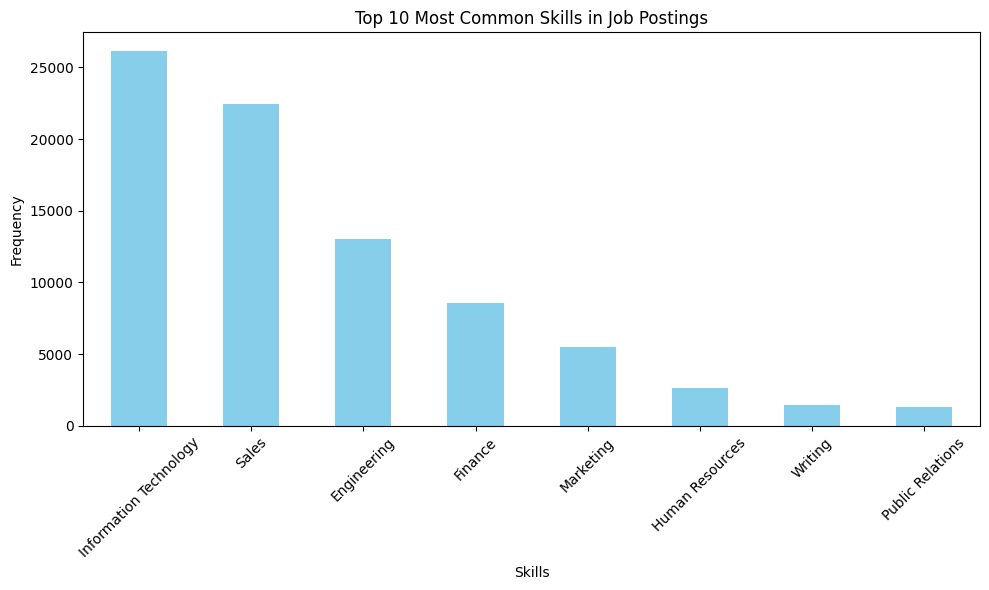

In [ ]:
# Remove rows where skill_abr does not match any known skill in the mapping
job_skills_df['full_skill'] = job_skills_df['skill_abr'].map(skill_mapping)

# Drop rows where skill_abr could not be mapped (NaN values)
job_skills_df = job_skills_df.dropna(subset=['full_skill'])

# Count the frequency of each valid skill
skill_counts = job_skills_df['full_skill'].value_counts()

# Plot the top 10 most common skills
plt.figure(figsize=(10, 6))
skill_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Skills in Job Postings')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Check the unique skills in the dataset
unique_skills = job_skills_df['full_skill'].unique()
print(unique_skills)


['Marketing' 'Public Relations' 'Writing' 'Sales' 'Finance' 'Engineering'
 'Information Technology' 'Human Resources']
